# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set the unit type
units = "imperial"

# Counter to count the number of calls to API
count = 1 

# Counter to count the number of call sets
sets = 1

# Index for the dataframe 
index = 0

# Create empty lists
city_list = []
cloudiness = []
country = []
date = []
maxtemp = []
windspeed = []
lat = []
lng = []
humidity = [] 

# Get current time
t0 =time.time()

print(f'Beginning Data Retrieval \n ........................')

for city in cities:
    try:
        city1 = city.replace(" ", "%20")
        print(f'Processing Record {count} of Set {sets} | {city}' )
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city1}"
        weather_response = requests.get(query_url)
        city_stats = weather_response.json()
        city_list.append(city_stats["name"])
        cloudiness.append(city_stats["clouds"]["all"])
        country.append(city_stats["sys"]["country"])
        date.append(city_stats["dt"])
        maxtemp.append(city_stats["main"]["temp_max"])
        windspeed.append(city_stats["wind"]["speed"])
        lat.append(city_stats["coord"]["lat"])
        lng.append(city_stats["coord"]["lon"])
        humidity.append(city_stats["main"]["humidity"])
        index = index + 1
    except KeyError:
        print('City not found. Skipping...')
    count = count+1
    
    # Loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
    if count == 51:
        t1=time.time()
        count = 1
        sets = sets + 1
        time.sleep(60-(t1-t0))
        t0=time.time()

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 1 | kloulklubed
Processing Record 2 of Set 1 | semey
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | kingaroy
Processing Record 6 of Set 1 | oktyabrskoye
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | puerto colombia
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | port moresby
Processing Record 21 of Set 1 | qaanaaq
Processing 

Processing Record 36 of Set 4 | saleaula
City not found. Skipping...
Processing Record 37 of Set 4 | tingi
Processing Record 38 of Set 4 | hualmay
Processing Record 39 of Set 4 | anadyr
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | bo
City not found. Skipping...
Processing Record 42 of Set 4 | bar harbor
Processing Record 43 of Set 4 | bonthe
Processing Record 44 of Set 4 | ucluelet
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | kabare
Processing Record 48 of Set 4 | tubruq
City not found. Skipping...
Processing Record 49 of Set 4 | inirida
Processing Record 50 of Set 4 | samarai
Processing Record 1 of Set 5 | teknaf
Processing Record 2 of Set 5 | lamu
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | sao filipe
Processing Record 6 of Set 5 | batemans bay
Processing Record 7 of Set 5 | bol

Processing Record 24 of Set 8 | choma
Processing Record 25 of Set 8 | ravar
Processing Record 26 of Set 8 | maldonado
Processing Record 27 of Set 8 | muros
Processing Record 28 of Set 8 | bengkulu
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | arlit
Processing Record 31 of Set 8 | george
Processing Record 32 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 8 | yumen
Processing Record 34 of Set 8 | churapcha
Processing Record 35 of Set 8 | el tigre
Processing Record 36 of Set 8 | shelburne
Processing Record 37 of Set 8 | tarime
Processing Record 38 of Set 8 | olenino
Processing Record 39 of Set 8 | nuuk
Processing Record 40 of Set 8 | fortuna
Processing Record 41 of Set 8 | kedougou
Processing Record 42 of Set 8 | paradwip
City not found. Skipping...
Processing Record 43 of Set 8 | pemangkat
Processing Record 44 of Set 8 | la serena
Processing Record 45 of Set 8 | kontagora
Processing Record 46 of Set 8 | hong gai
Processing Recor

Processing Record 12 of Set 12 | solton
Processing Record 13 of Set 12 | antagan
City not found. Skipping...
Processing Record 14 of Set 12 | sinop
Processing Record 15 of Set 12 | skjaerhollen
City not found. Skipping...
Processing Record 16 of Set 12 | sao jose de ribamar
Processing Record 17 of Set 12 | miri
Processing Record 18 of Set 12 | coulihaut
City not found. Skipping...
Processing Record 19 of Set 12 | sfantu gheorghe
Processing Record 20 of Set 12 | iwanai
Processing Record 21 of Set 12 | dalmatovo
Processing Record 22 of Set 12 | lagoa
Processing Record 23 of Set 12 | amuntai
Processing Record 24 of Set 12 | lydenburg
Processing Record 25 of Set 12 | bafata
Processing Record 26 of Set 12 | otukpo
Processing Record 27 of Set 12 | saint-georges
Processing Record 28 of Set 12 | bridlington
Processing Record 29 of Set 12 | verkhneyarkeyevo
Processing Record 30 of Set 12 | pringsewu
Processing Record 31 of Set 12 | baykit
Processing Record 32 of Set 12 | dalby
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Store data to DataFrame
WeatherPy_df = pd.DataFrame({"City": city_list,
                             "Lat": lat,
                             "Lng": lng,
                             "Max Temp": maxtemp,
                             "Humidity": humidity,
                             "Cloudiness": cloudiness,
                             "Wind Speed": windspeed,
                             "Country": country,
                             "Date": date})

# Save as cvs file
WeatherPy_df.to_csv("outputs/WeatherPy.csv", encoding='utf-8', index=False)

In [7]:
WeatherPy_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kloulklubed,7.0419,134.2556,86.00,66,75,13.80,PW,1614909355
1,Semey,50.4111,80.2275,23.00,93,75,20.13,KZ,1614909308
2,Mataura,-46.1927,168.8643,58.51,65,100,4.85,NZ,1614909357
3,Cape Town,-33.9258,18.4232,69.01,68,0,16.11,ZA,1614909249
4,Kingaroy,-26.5333,151.8333,80.60,44,40,6.91,AU,1614909357
...,...,...,...,...,...,...,...,...,...
576,Teacapan,22.5500,-105.7500,68.27,67,48,8.14,MX,1614910096
577,Meulaboh,4.1363,96.1285,81.05,81,2,3.85,ID,1614909827
578,Urucará,-2.5364,-57.7600,74.35,94,60,0.85,BR,1614910097
579,Diego de Almagro,-26.3667,-70.0500,59.88,62,0,1.12,CL,1614910097


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Condition if cleanning up dataframe is needed.
if WeatherPy_df['Humidity'].max() > 100:
    print('There is a city has Humidity value > 100%. Need to cleanup DataFrame.')
else:
    print('No humidity value > 100%. Move on to next step.')

No humidity value > 100%. Move on to next step.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

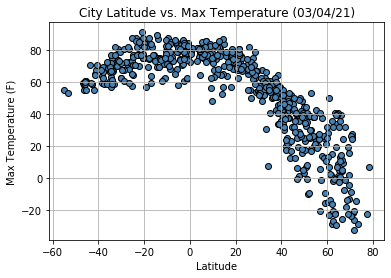

In [9]:
plt.scatter(WeatherPy_df['Lat'], WeatherPy_df['Max Temp'],
            marker="o", facecolors="steelblue", edgecolors="black")
plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('outputs/LatVsTemp.png')
plt.show()

* The plot above show the temperature as we go from South (-60) to North (80). The highest max temperature values are focus around the Equator (0)

## Latitude vs. Humidity Plot

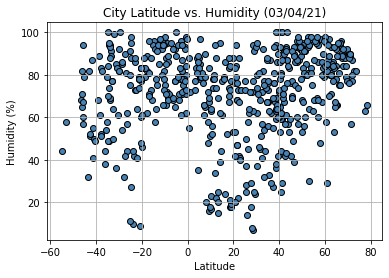

In [11]:
plt.scatter(WeatherPy_df['Lat'], WeatherPy_df['Humidity'],
            marker="o", facecolors="steelblue", edgecolors="black")
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('outputs/LatVsHumidity.png')
plt.show()

* The plot above show the humidity as we go from South (-60) to North (80). The humidity values are spread out almost evenly with high values (mostly greater than 60%)

## Latitude vs. Cloudiness Plot

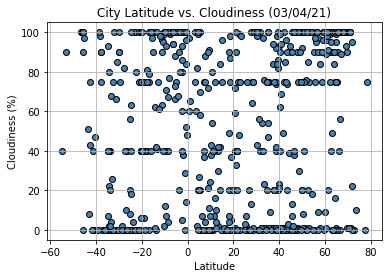

In [13]:
plt.scatter(WeatherPy_df['Lat'], WeatherPy_df['Cloudiness'],
            marker="o", facecolors="steelblue", edgecolors="black")
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('outputs/LatVsCloudiness.png')
plt.show()

* The plot above shows the cloudiness as we go from South (-60) to North (80). The lowest values focus in the latitude of -60 to -20 and 4 to 70, while the highest values focus in the latitude of -30 to 3 and 40 to 75

## Latitude vs. Wind Speed Plot

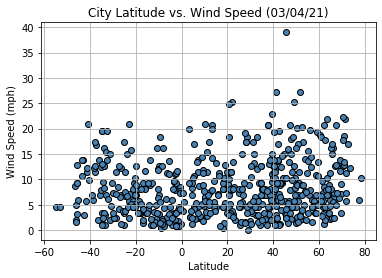

In [14]:
plt.scatter(WeatherPy_df['Lat'], WeatherPy_df['Wind Speed'],
            marker="o", facecolors="steelblue", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('outputs/LatVsWindSpeed.png')
plt.show()

* The plot above show the wind speed as we go from South (-60) to North (80). The values are spread out evenly with the values mostly below 7.5 mph

## Linear Regression

In [15]:
north_df = WeatherPy_df[WeatherPy_df.Lat >= 0]
south_df = WeatherPy_df[WeatherPy_df.Lat >= 0]

north_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kloulklubed,7.0419,134.2556,86.00,66,75,13.80,PW,1614909355
1,Semey,50.4111,80.2275,23.00,93,75,20.13,KZ,1614909308
5,Oktyabr'skoye,43.0645,44.7417,21.20,93,0,8.95,RU,1614909357
6,Upernavik,72.7868,-56.1549,-14.21,82,0,17.00,GL,1614909358
7,Lavrentiya,65.5833,-171.0000,12.97,94,100,16.33,RU,1614909359
...,...,...,...,...,...,...,...,...,...
574,Kyshtovka,56.5550,76.6271,27.45,98,100,14.43,RU,1614910095
575,Sovetskiy,61.3614,63.5842,2.35,94,20,2.84,RU,1614909846
576,Teacapan,22.5500,-105.7500,68.27,67,48,8.14,MX,1614910096
577,Meulaboh,4.1363,96.1285,81.05,81,2,3.85,ID,1614909827


In [16]:
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kloulklubed,7.0419,134.2556,86.00,66,75,13.80,PW,1614909355
1,Semey,50.4111,80.2275,23.00,93,75,20.13,KZ,1614909308
5,Oktyabr'skoye,43.0645,44.7417,21.20,93,0,8.95,RU,1614909357
6,Upernavik,72.7868,-56.1549,-14.21,82,0,17.00,GL,1614909358
7,Lavrentiya,65.5833,-171.0000,12.97,94,100,16.33,RU,1614909359
...,...,...,...,...,...,...,...,...,...
574,Kyshtovka,56.5550,76.6271,27.45,98,100,14.43,RU,1614910095
575,Sovetskiy,61.3614,63.5842,2.35,94,20,2.84,RU,1614909846
576,Teacapan,22.5500,-105.7500,68.27,67,48,8.14,MX,1614910096
577,Meulaboh,4.1363,96.1285,81.05,81,2,3.85,ID,1614909827


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression